# Auswertung Kerneldensity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

base = pd.read_csv('additional_data/base.csv')

folder = 'unscaled'

backfill = pd.read_csv(f'additional_data/imputed_sets/{folder}/backfill.csv')
yearly_mean = pd.read_csv(f'additional_data/imputed_sets/{folder}/Yearly Mean.csv')
overall_mean = pd.read_csv(f'additional_data/imputed_sets/{folder}/Overall Mean.csv')
regional_mean = pd.read_csv(f'additional_data/imputed_sets/{folder}/Yearly Mean per Region.csv')
interpolation_all = pd.read_csv(f'additional_data/imputed_sets/{folder}/Interpolate all.csv')
interpolation_3 = pd.read_csv(f'additional_data/imputed_sets/{folder}/Interpolate 3.csv')
ice1 = pd.read_csv(f'additional_data/imputed_sets/{folder}/ICE 1.csv')
ice2 = pd.read_csv(f'additional_data/imputed_sets/{folder}/ICE 2.csv')
ice3 = pd.read_csv(f'additional_data/imputed_sets/{folder}/ICE 3.csv')
mice1 = pd.read_csv(f'additional_data/imputed_sets/{folder}/MICE 1.csv')
mice2 = pd.read_csv(f'additional_data/imputed_sets/{folder}/MICE 2.csv')
knn1 = pd.read_csv(f'additional_data/imputed_sets/{folder}/KNN 1.csv')
knn2 = pd.read_csv(f'additional_data/imputed_sets/{folder}/KNN 2.csv')

sets =  {'Backfill': backfill, 'Overall Mean':overall_mean, 
              'Yearly Mean':yearly_mean, 'Yearly Mean per Region':regional_mean, 
              'Interpolate 3':interpolation_3, 'Interpolate all':interpolation_all, 
              'ICE 1':ice1, 'ICE 2':ice2, 
              'ICE 3':ice3, 'MICE 1':mice1, 'MICE 2':mice2, 
              'KNN 1':knn1, 'KNN 2':knn2
             }

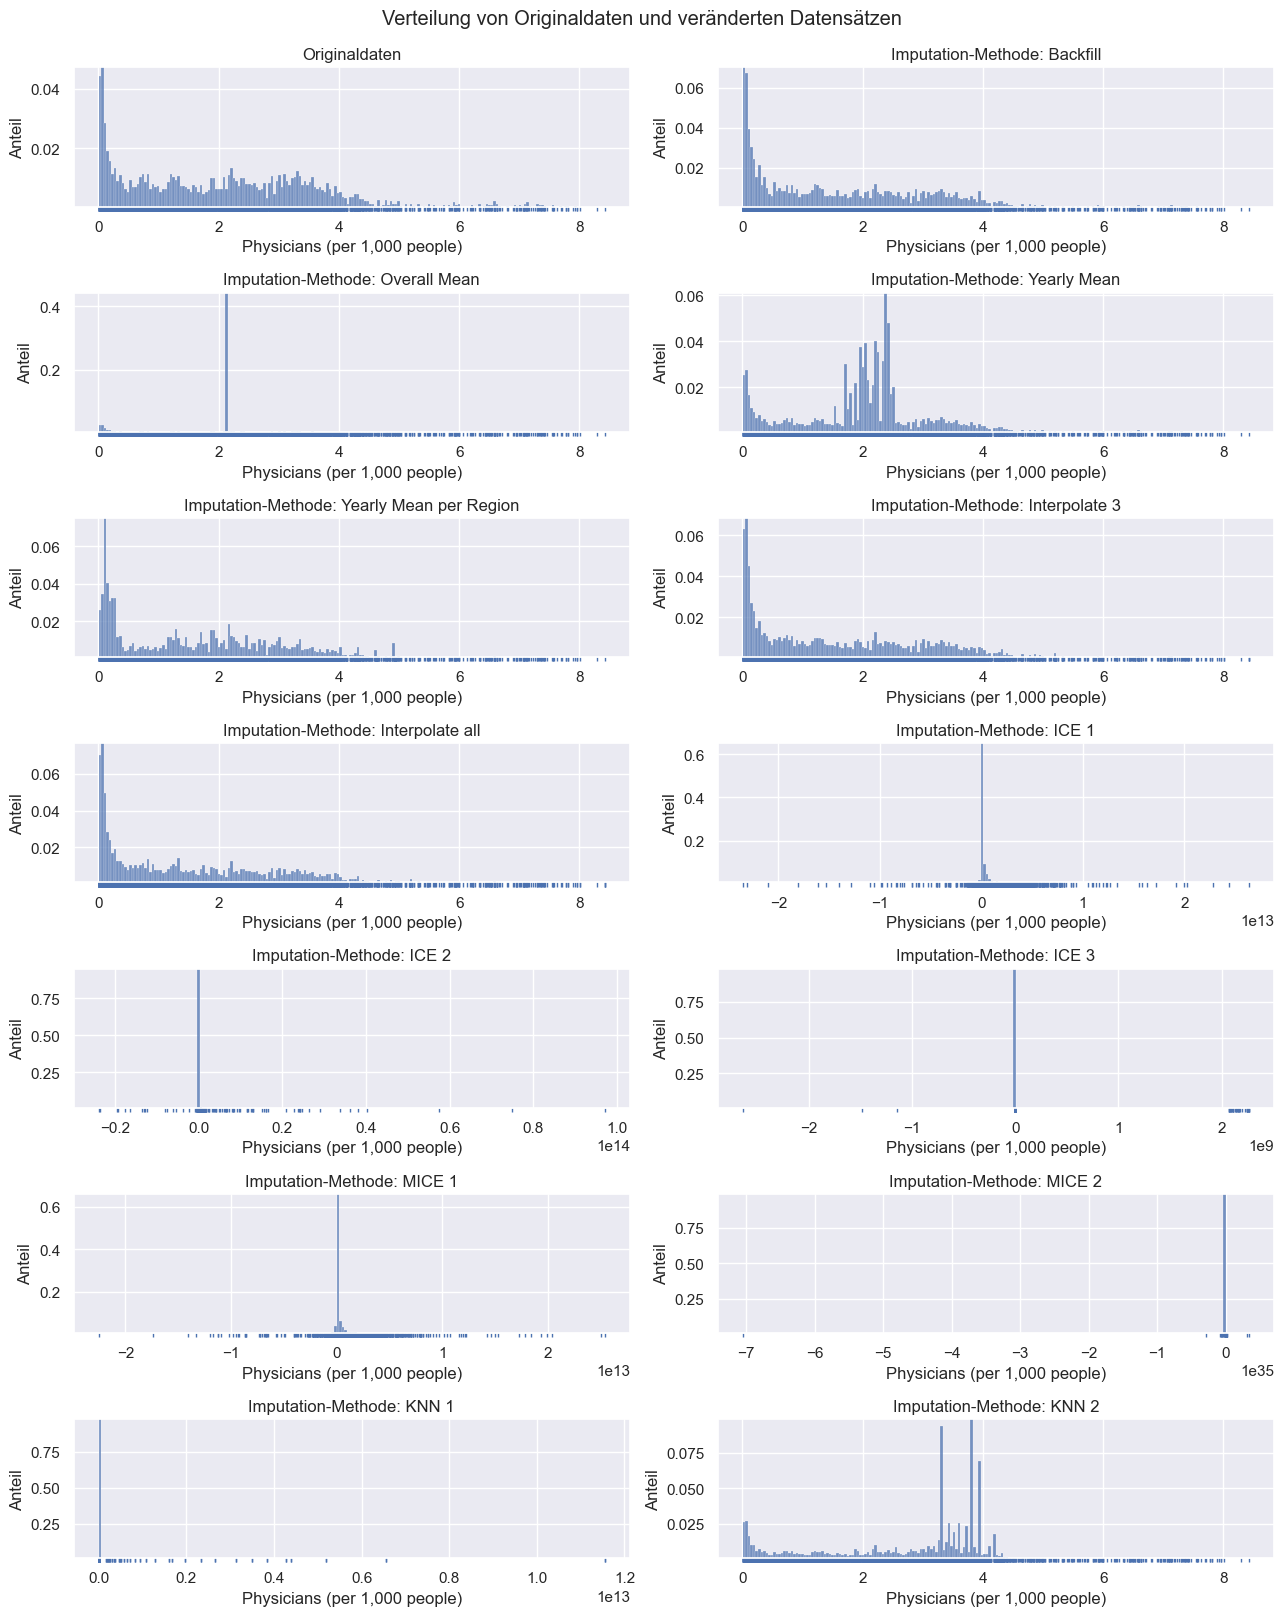

In [8]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
    sns.histplot(data=df_i.stack(), bins=200, stat='proportion', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i.stack(), height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)


plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_education')

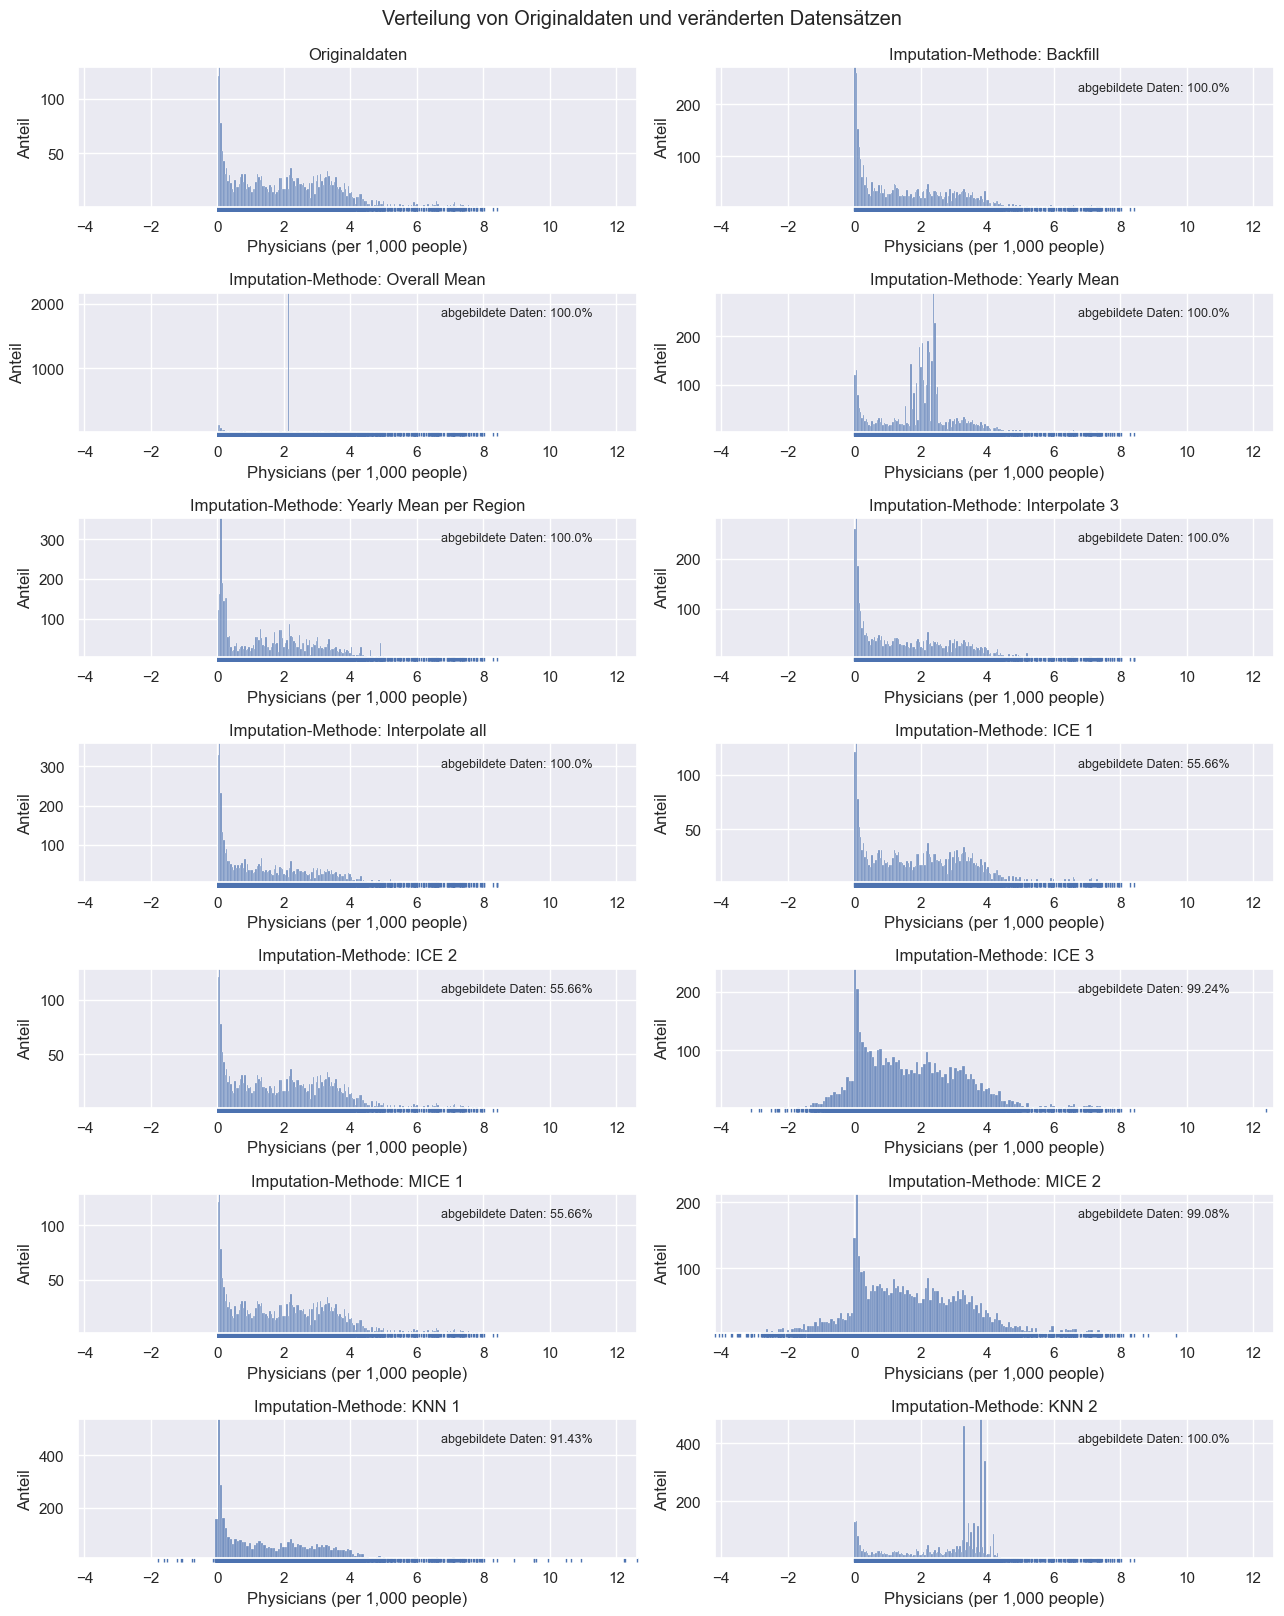

In [9]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

#define boundaries around original data
df_min = df_base.stack().min()
df_max = df_base.stack().max()
xmin = df_min-(df_max-df_min)*0.5
xmax = df_max+(df_max-df_min)*0.5

sns.histplot(data=df_base.stack(), bins=200, stat='count', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.histplot(data=df_i, bins=200, stat='count', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].text(0.65, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_education_all')

In [4]:
folder = 'scaled'

base = pd.read_csv('additional_data/base.csv')

backfill = pd.read_csv(f'additional_data/imputed_sets/{folder}/backfill.csv')
yearly_mean = pd.read_csv(f'additional_data/imputed_sets/{folder}/Yearly Mean.csv')
overall_mean = pd.read_csv(f'additional_data/imputed_sets/{folder}/Overall Mean.csv')
regional_mean = pd.read_csv(f'additional_data/imputed_sets/{folder}/Yearly Mean per Region.csv')
interpolation_all = pd.read_csv(f'additional_data/imputed_sets/{folder}/Interpolate all.csv')
interpolation_3 = pd.read_csv(f'additional_data/imputed_sets/{folder}/Interpolate 3.csv')
ice1 = pd.read_csv(f'additional_data/imputed_sets/{folder}/ICE 1.csv')
ice2 = pd.read_csv(f'additional_data/imputed_sets/{folder}/ICE 2.csv')
ice3 = pd.read_csv(f'additional_data/imputed_sets/{folder}/ICE 3.csv')
mice1 = pd.read_csv(f'additional_data/imputed_sets/{folder}/MICE 1.csv')
mice2 = pd.read_csv(f'additional_data/imputed_sets/{folder}/MICE 2.csv')
knn1 = pd.read_csv(f'additional_data/imputed_sets/{folder}/KNN 1.csv')
knn2 = pd.read_csv(f'additional_data/imputed_sets/{folder}/KNN 2.csv')

sets =  {'Backfill': backfill, 'Overall Mean':overall_mean, 
              'Yearly Mean':yearly_mean, 'Yearly Mean per Region':regional_mean, 
              'Interpolate 3':interpolation_3, 'Interpolate all':interpolation_all, 
              'ICE 1':ice1, 'ICE 2':ice2, 
              'ICE 3':ice3, 'MICE 1':mice1, 'MICE 2':mice2, 
              'KNN 1':knn1, 'KNN 2':knn2
             }

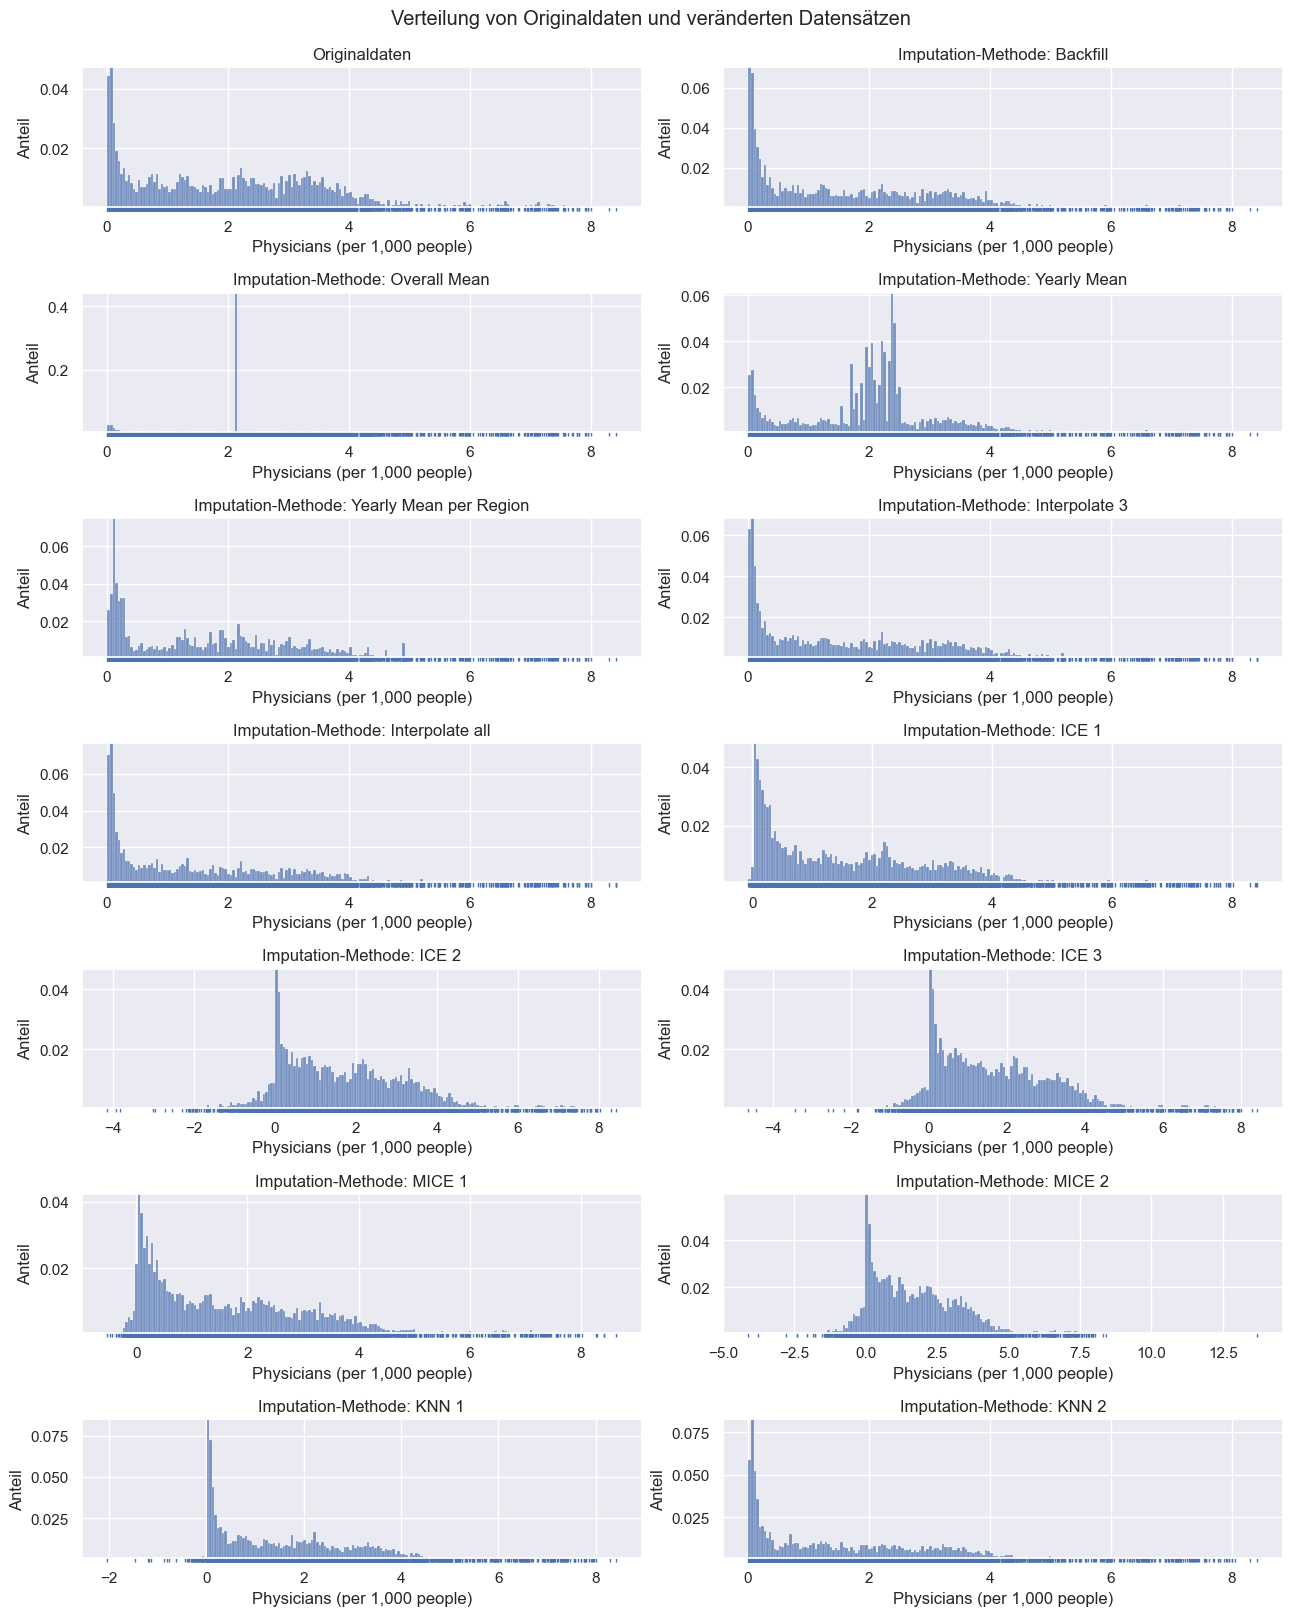

In [5]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
    sns.histplot(data=df_i.stack(), bins=200, stat='proportion', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i.stack(), height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)


plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_education')

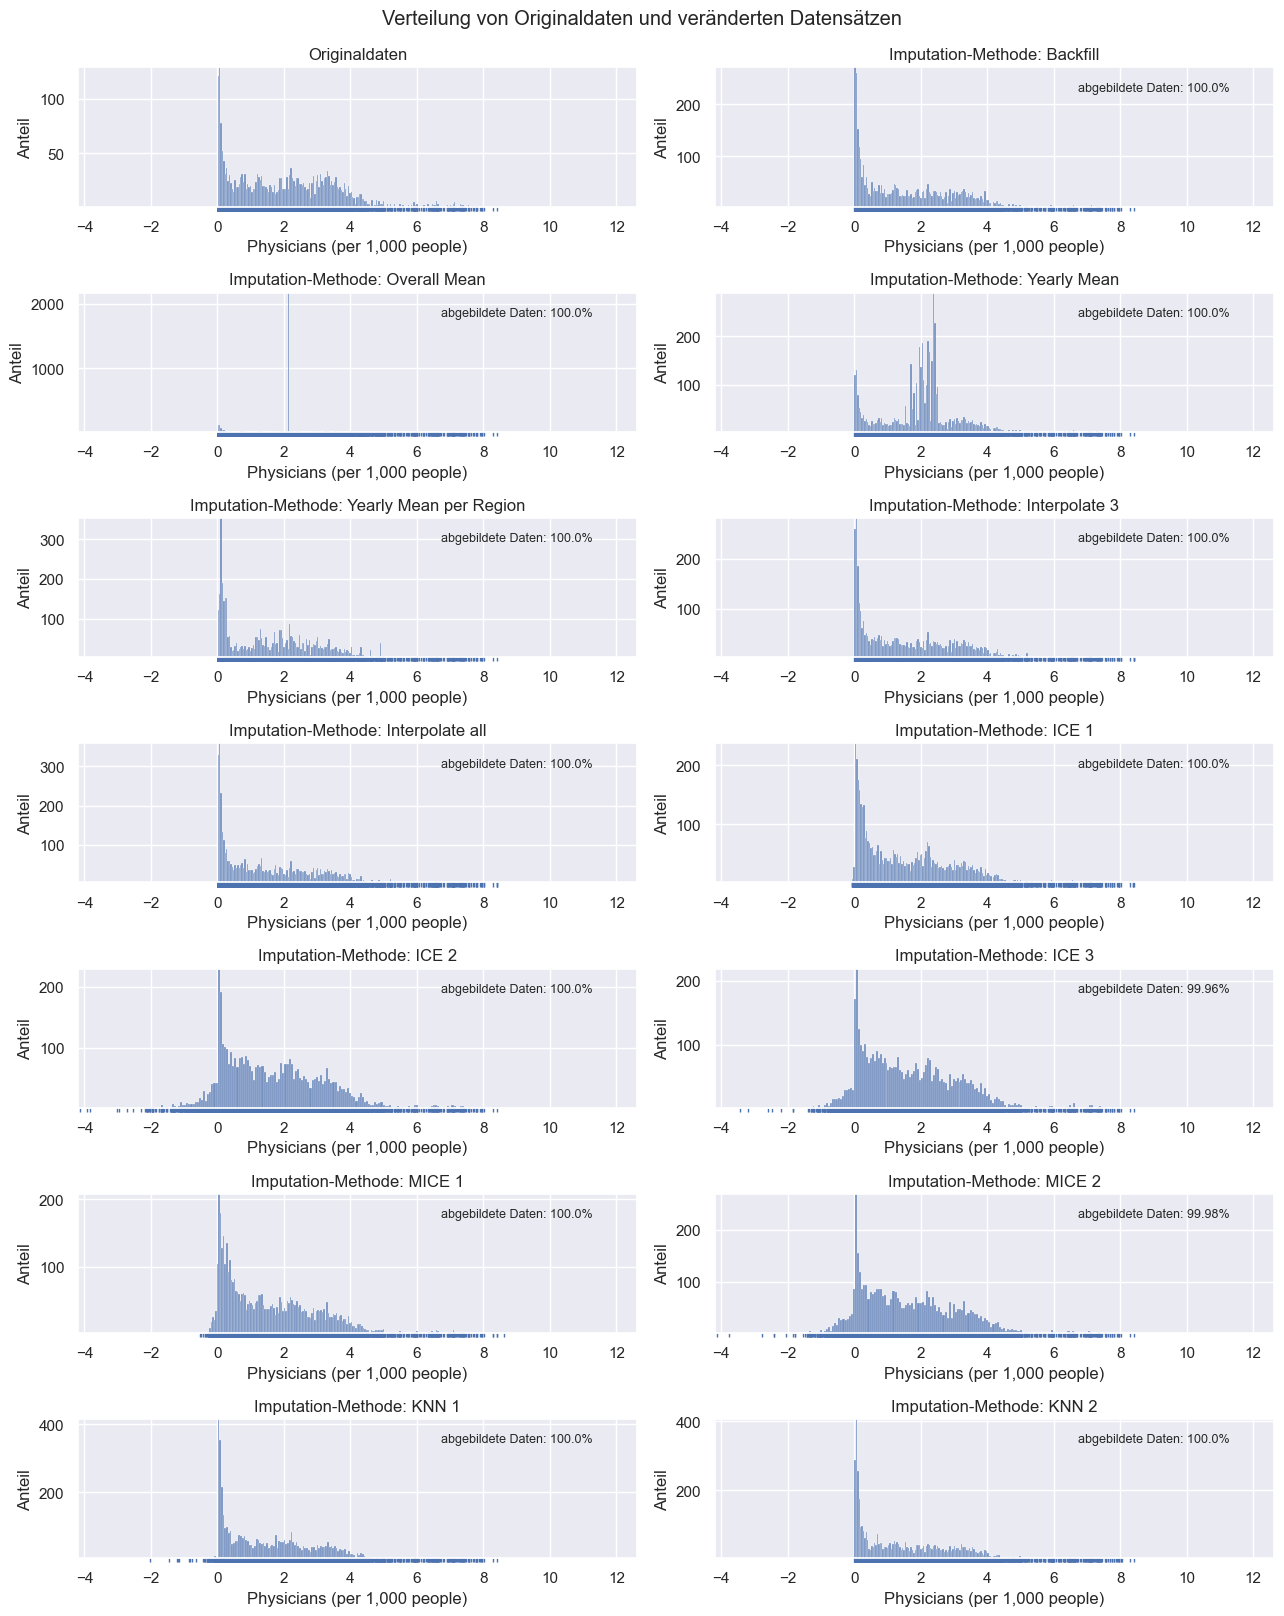

In [6]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

#define boundaries around original data
df_min = df_base.stack().min()
df_max = df_base.stack().max()
xmin = df_min-(df_max-df_min)*0.5
xmax = df_max+(df_max-df_min)*0.5

sns.histplot(data=df_base.stack(), bins=200, stat='count', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.histplot(data=df_i, bins=200, stat='count', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].text(0.65, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_education_all')

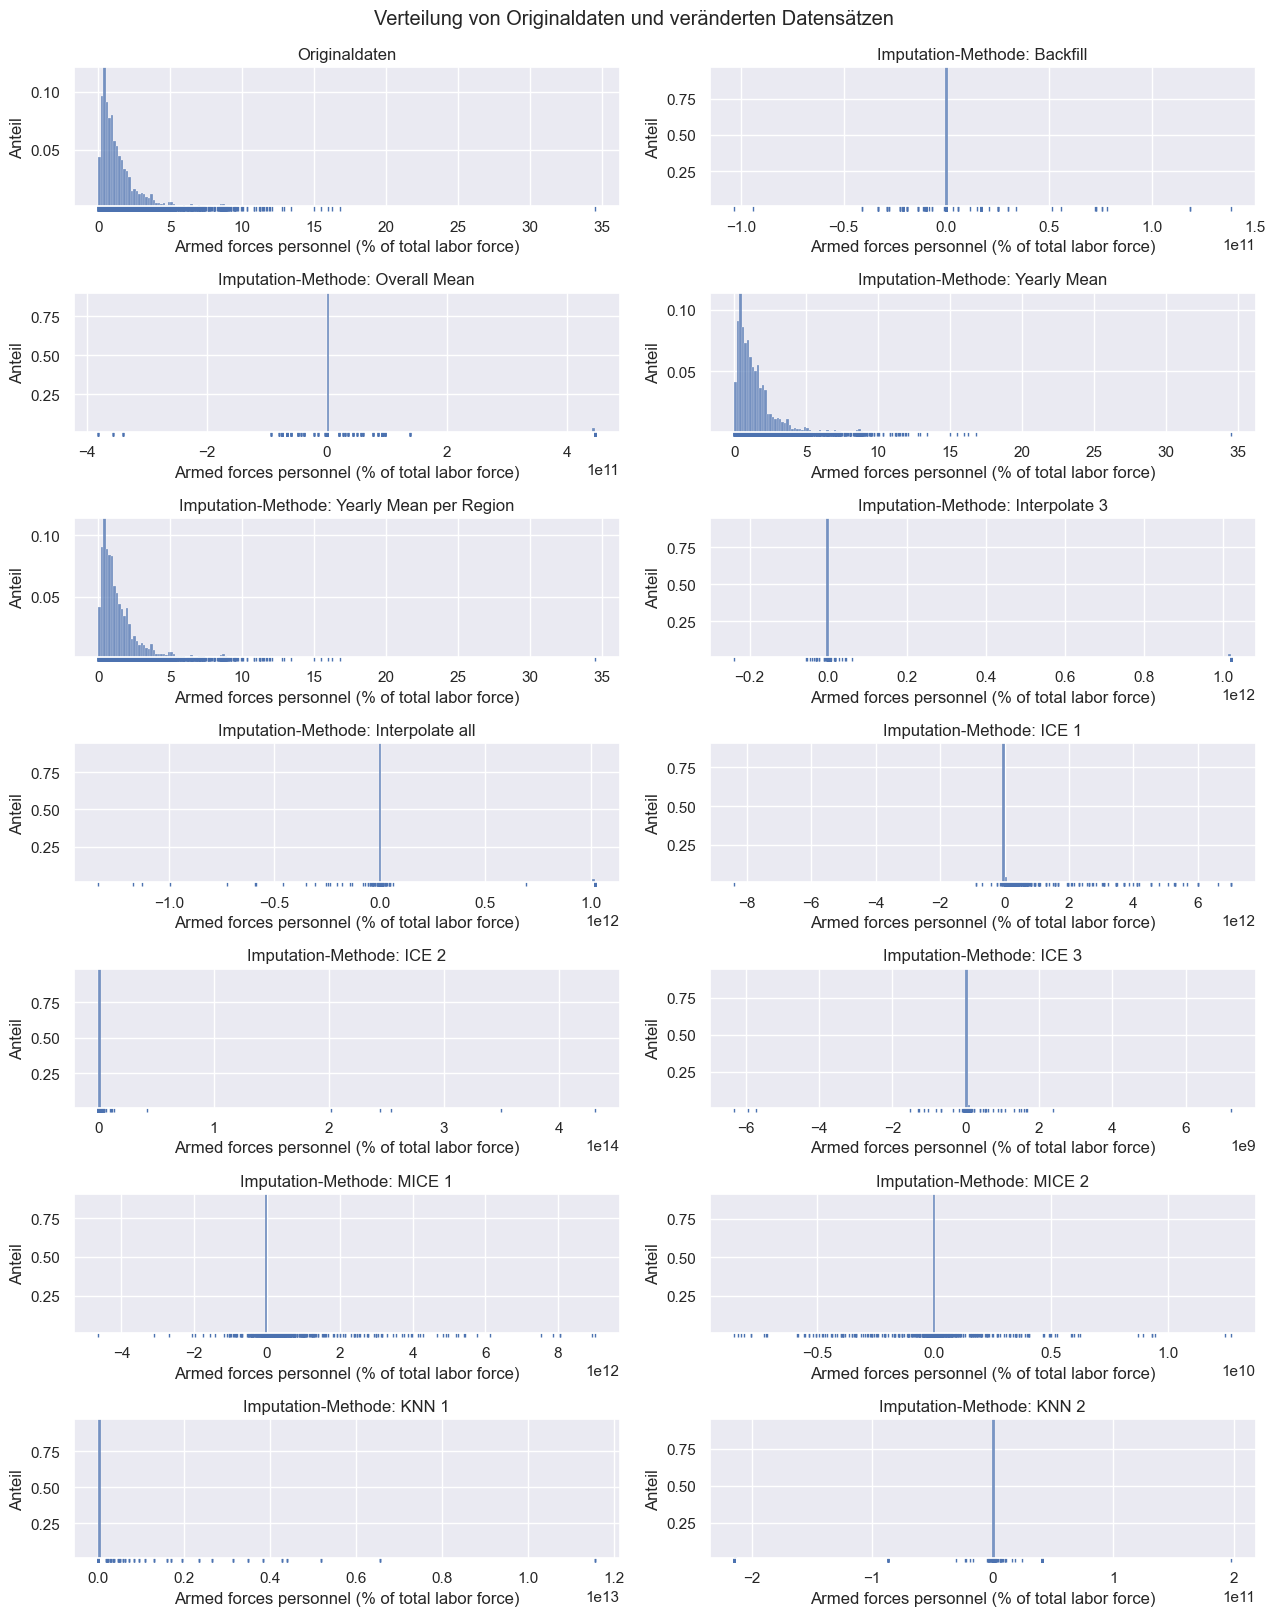

In [5]:
x='Armed forces personnel (% of total labor force)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
    sns.histplot(data=df_i.stack(), bins=200, stat='proportion', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i.stack(), height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)


plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_education')

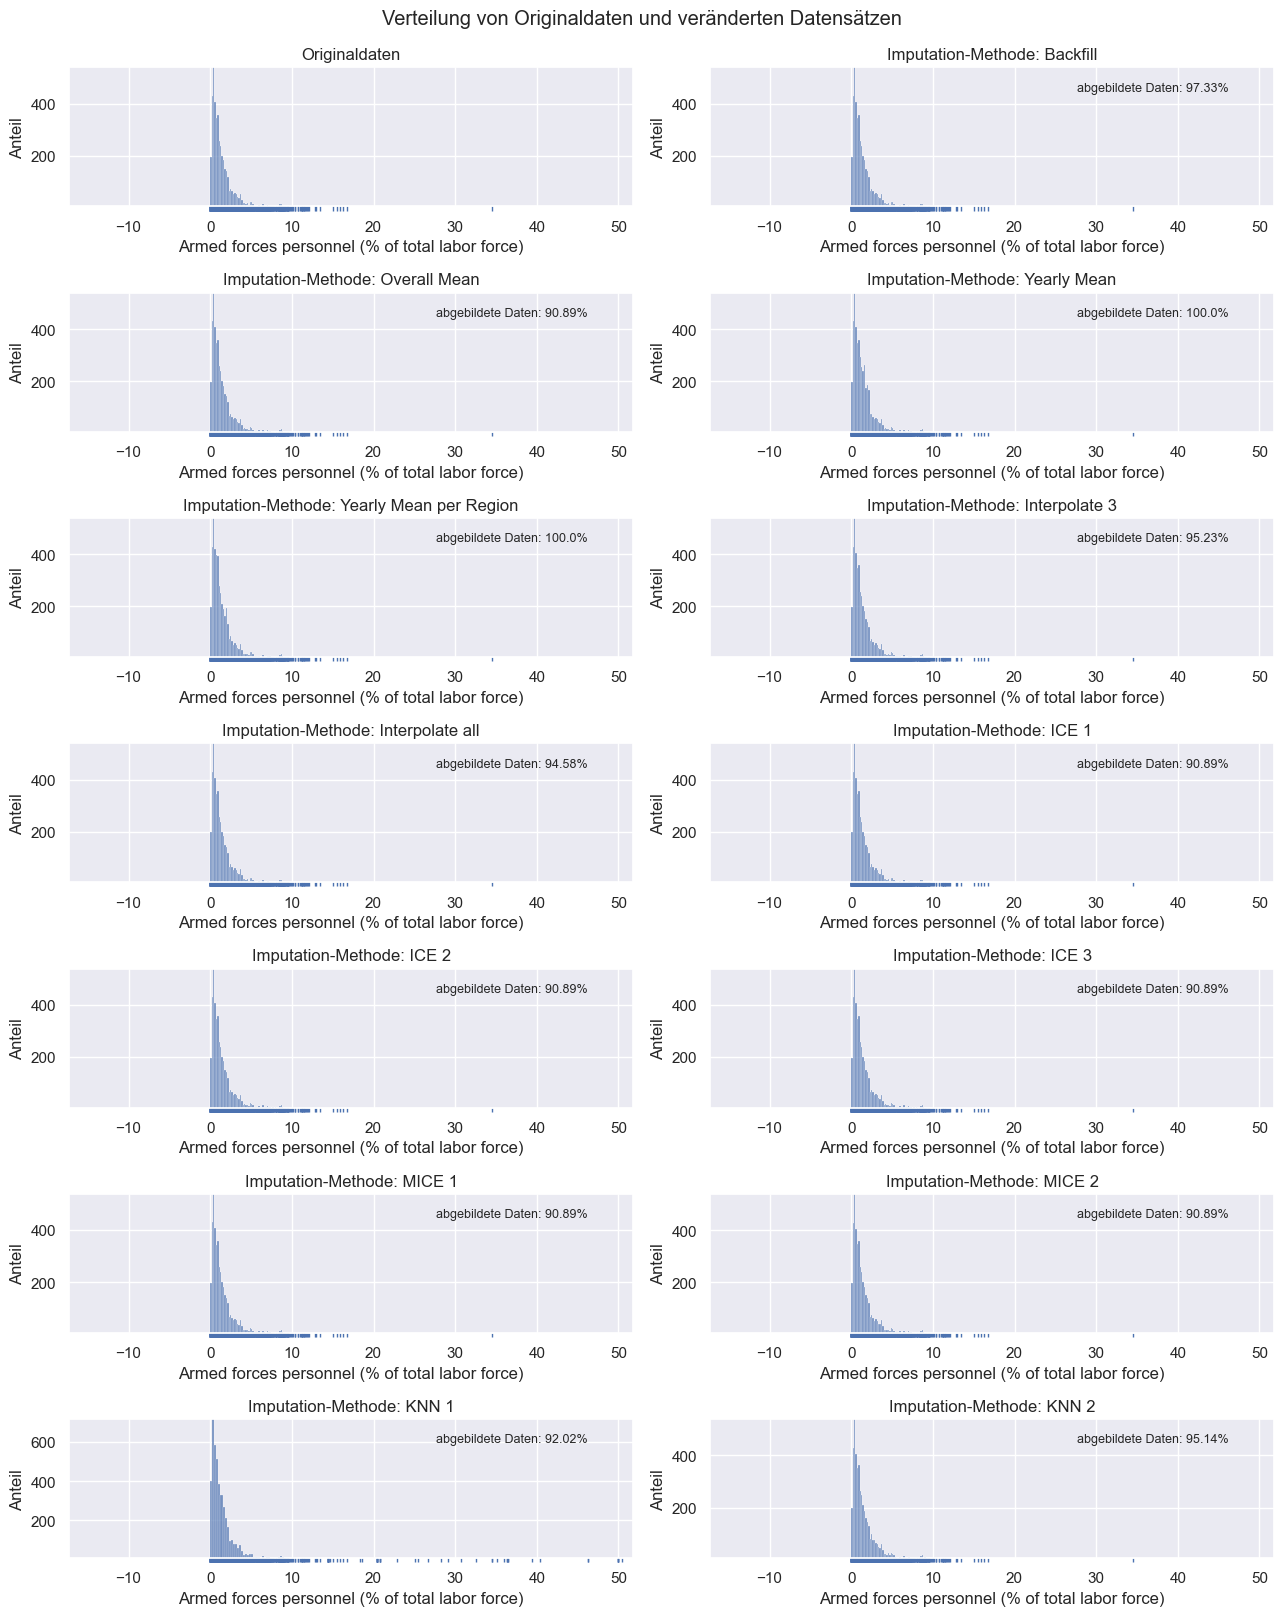

In [6]:
x='Armed forces personnel (% of total labor force)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

df_min = df_base.stack().min()
df_max = df_base.stack().max()
xmin = df_min-(df_max-df_min)*0.5
xmax = df_max+(df_max-df_min)*0.5

sns.histplot(data=df_base.stack(), bins=200, stat='count', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.histplot(data=df_i, bins=200, stat='count', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].text(0.65, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_education_all')